<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Загрузка данных

In [22]:
data = pd.read_csv('/datasets/insurance.csv')

In [23]:
try:
    data_example = pd.read_csv('/datasets/insurance.csv')
    print('Загрузилось')
except:
    print("Возникла ошибка при загрузке базы данных")

Загрузилось


In [24]:
data_example

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [25]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [26]:
data.duplicated().sum()

153

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


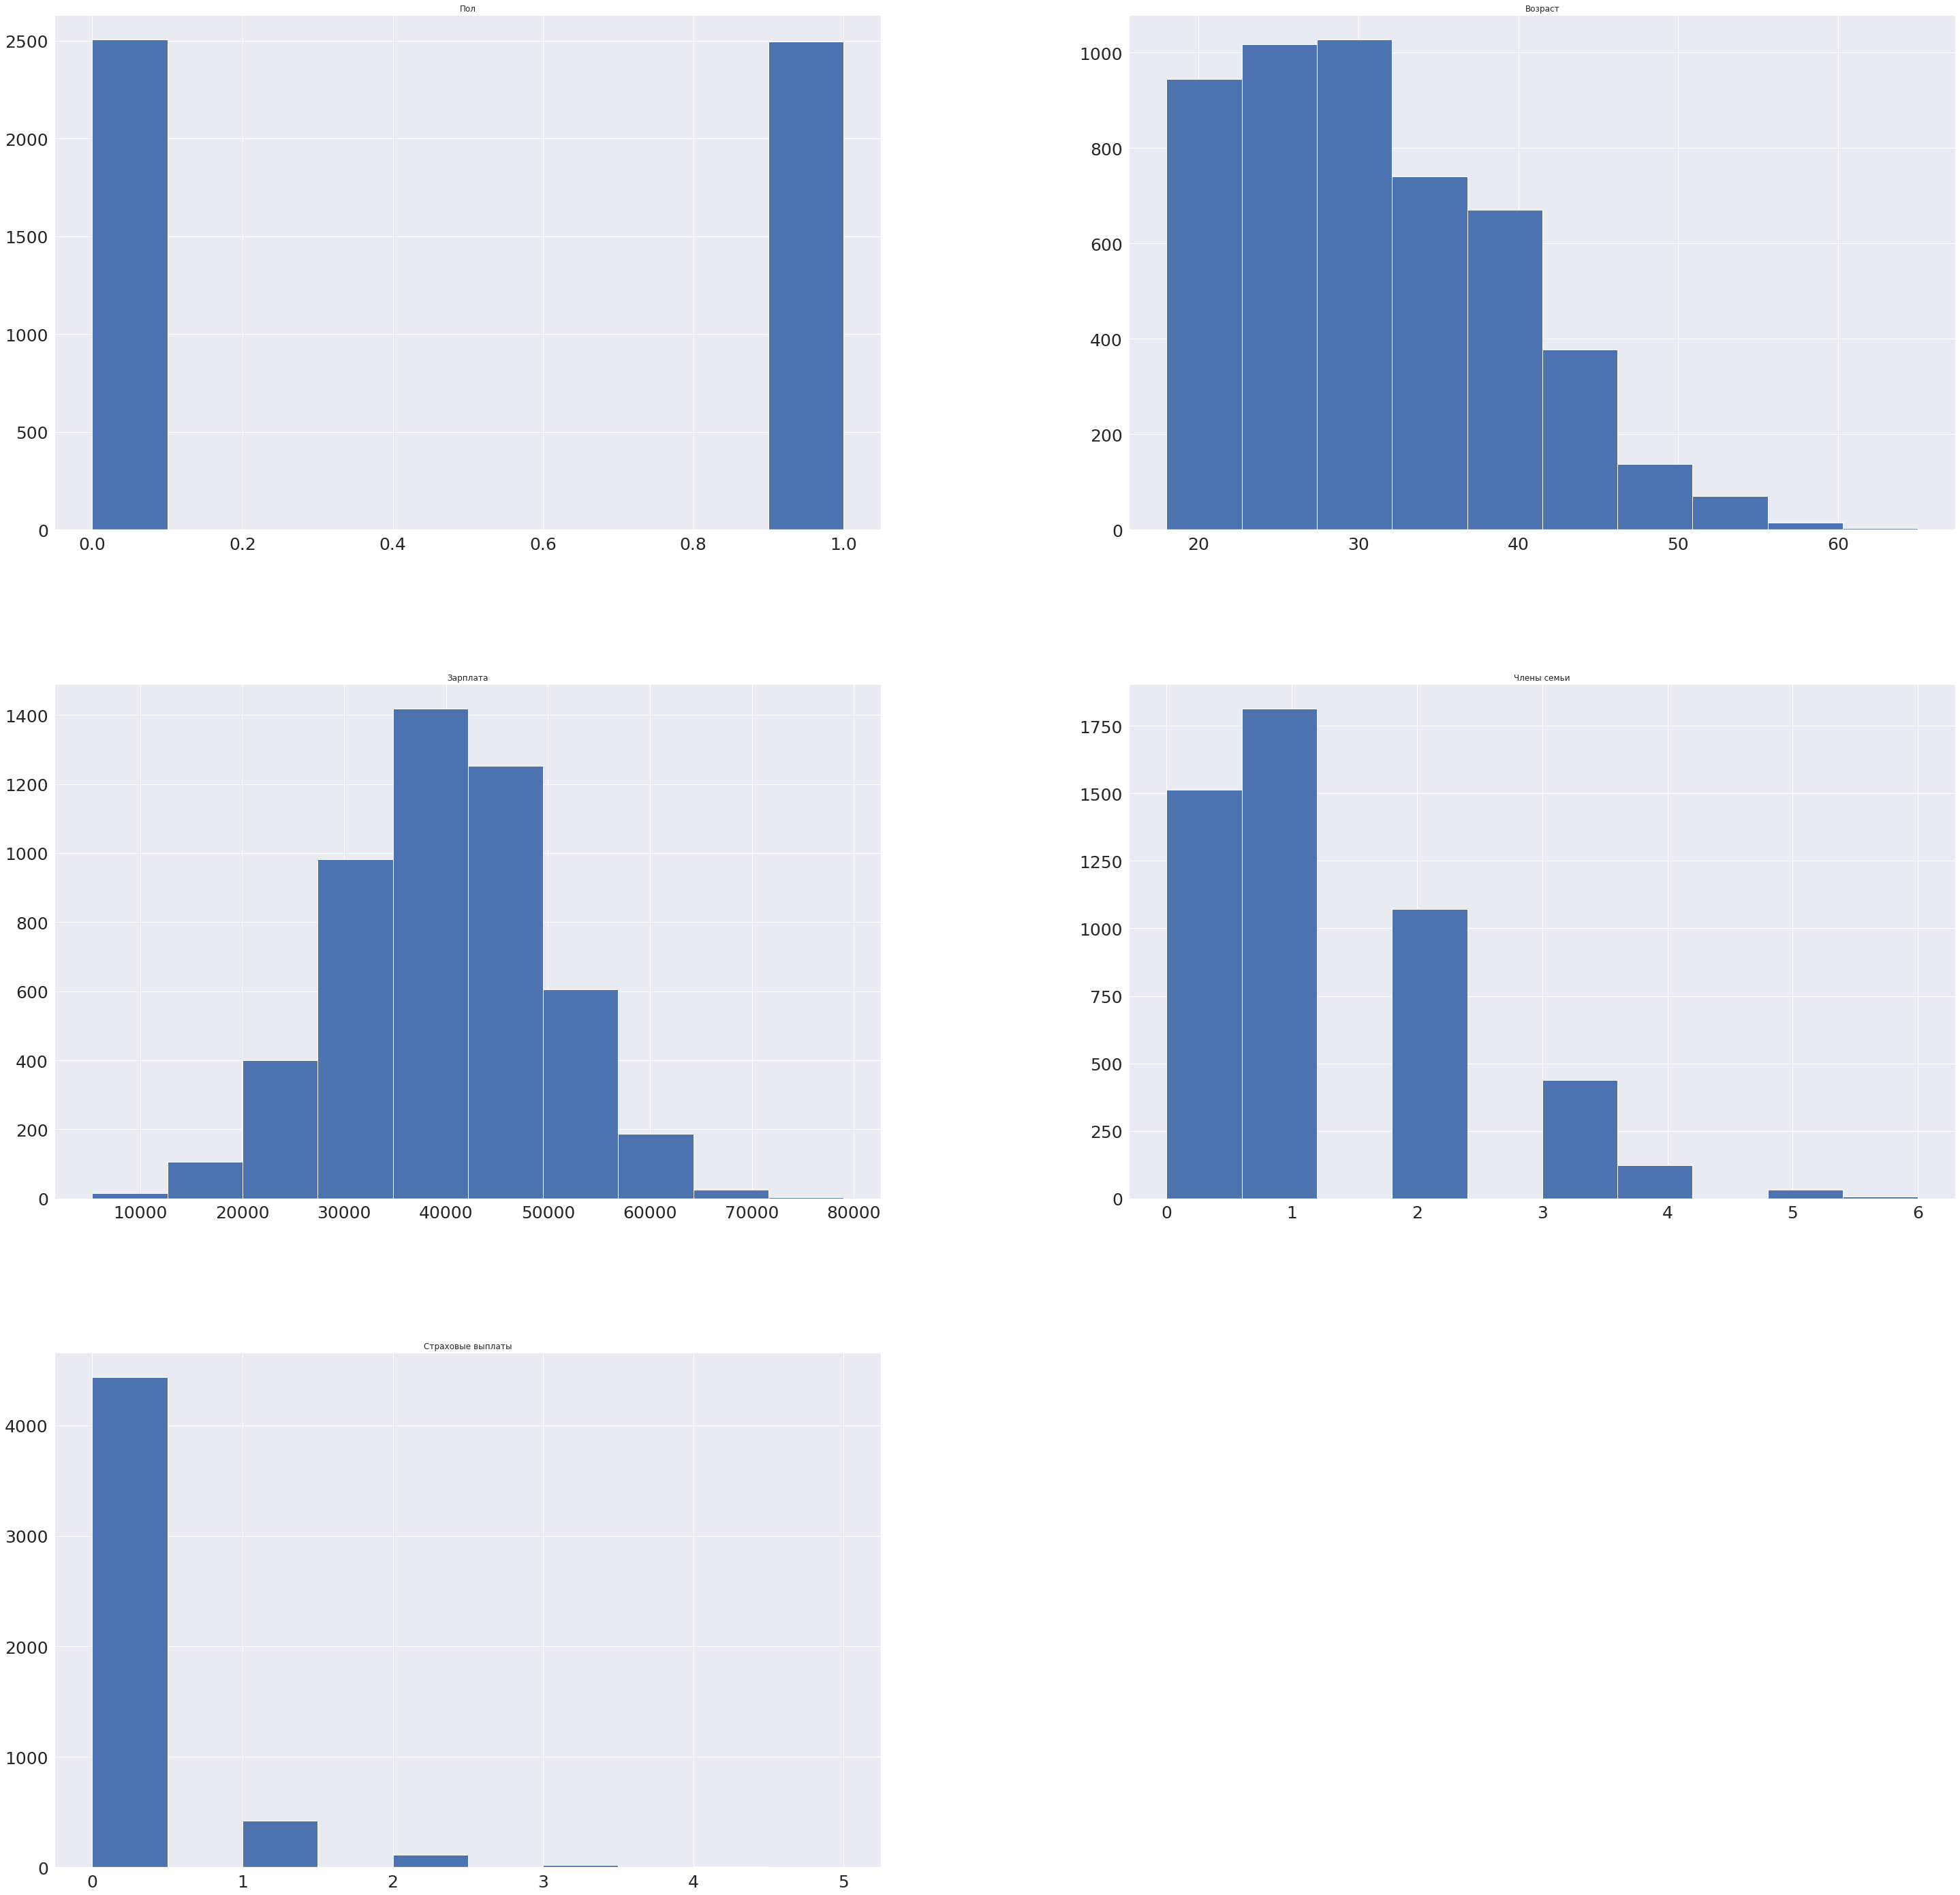

In [28]:
data.hist();

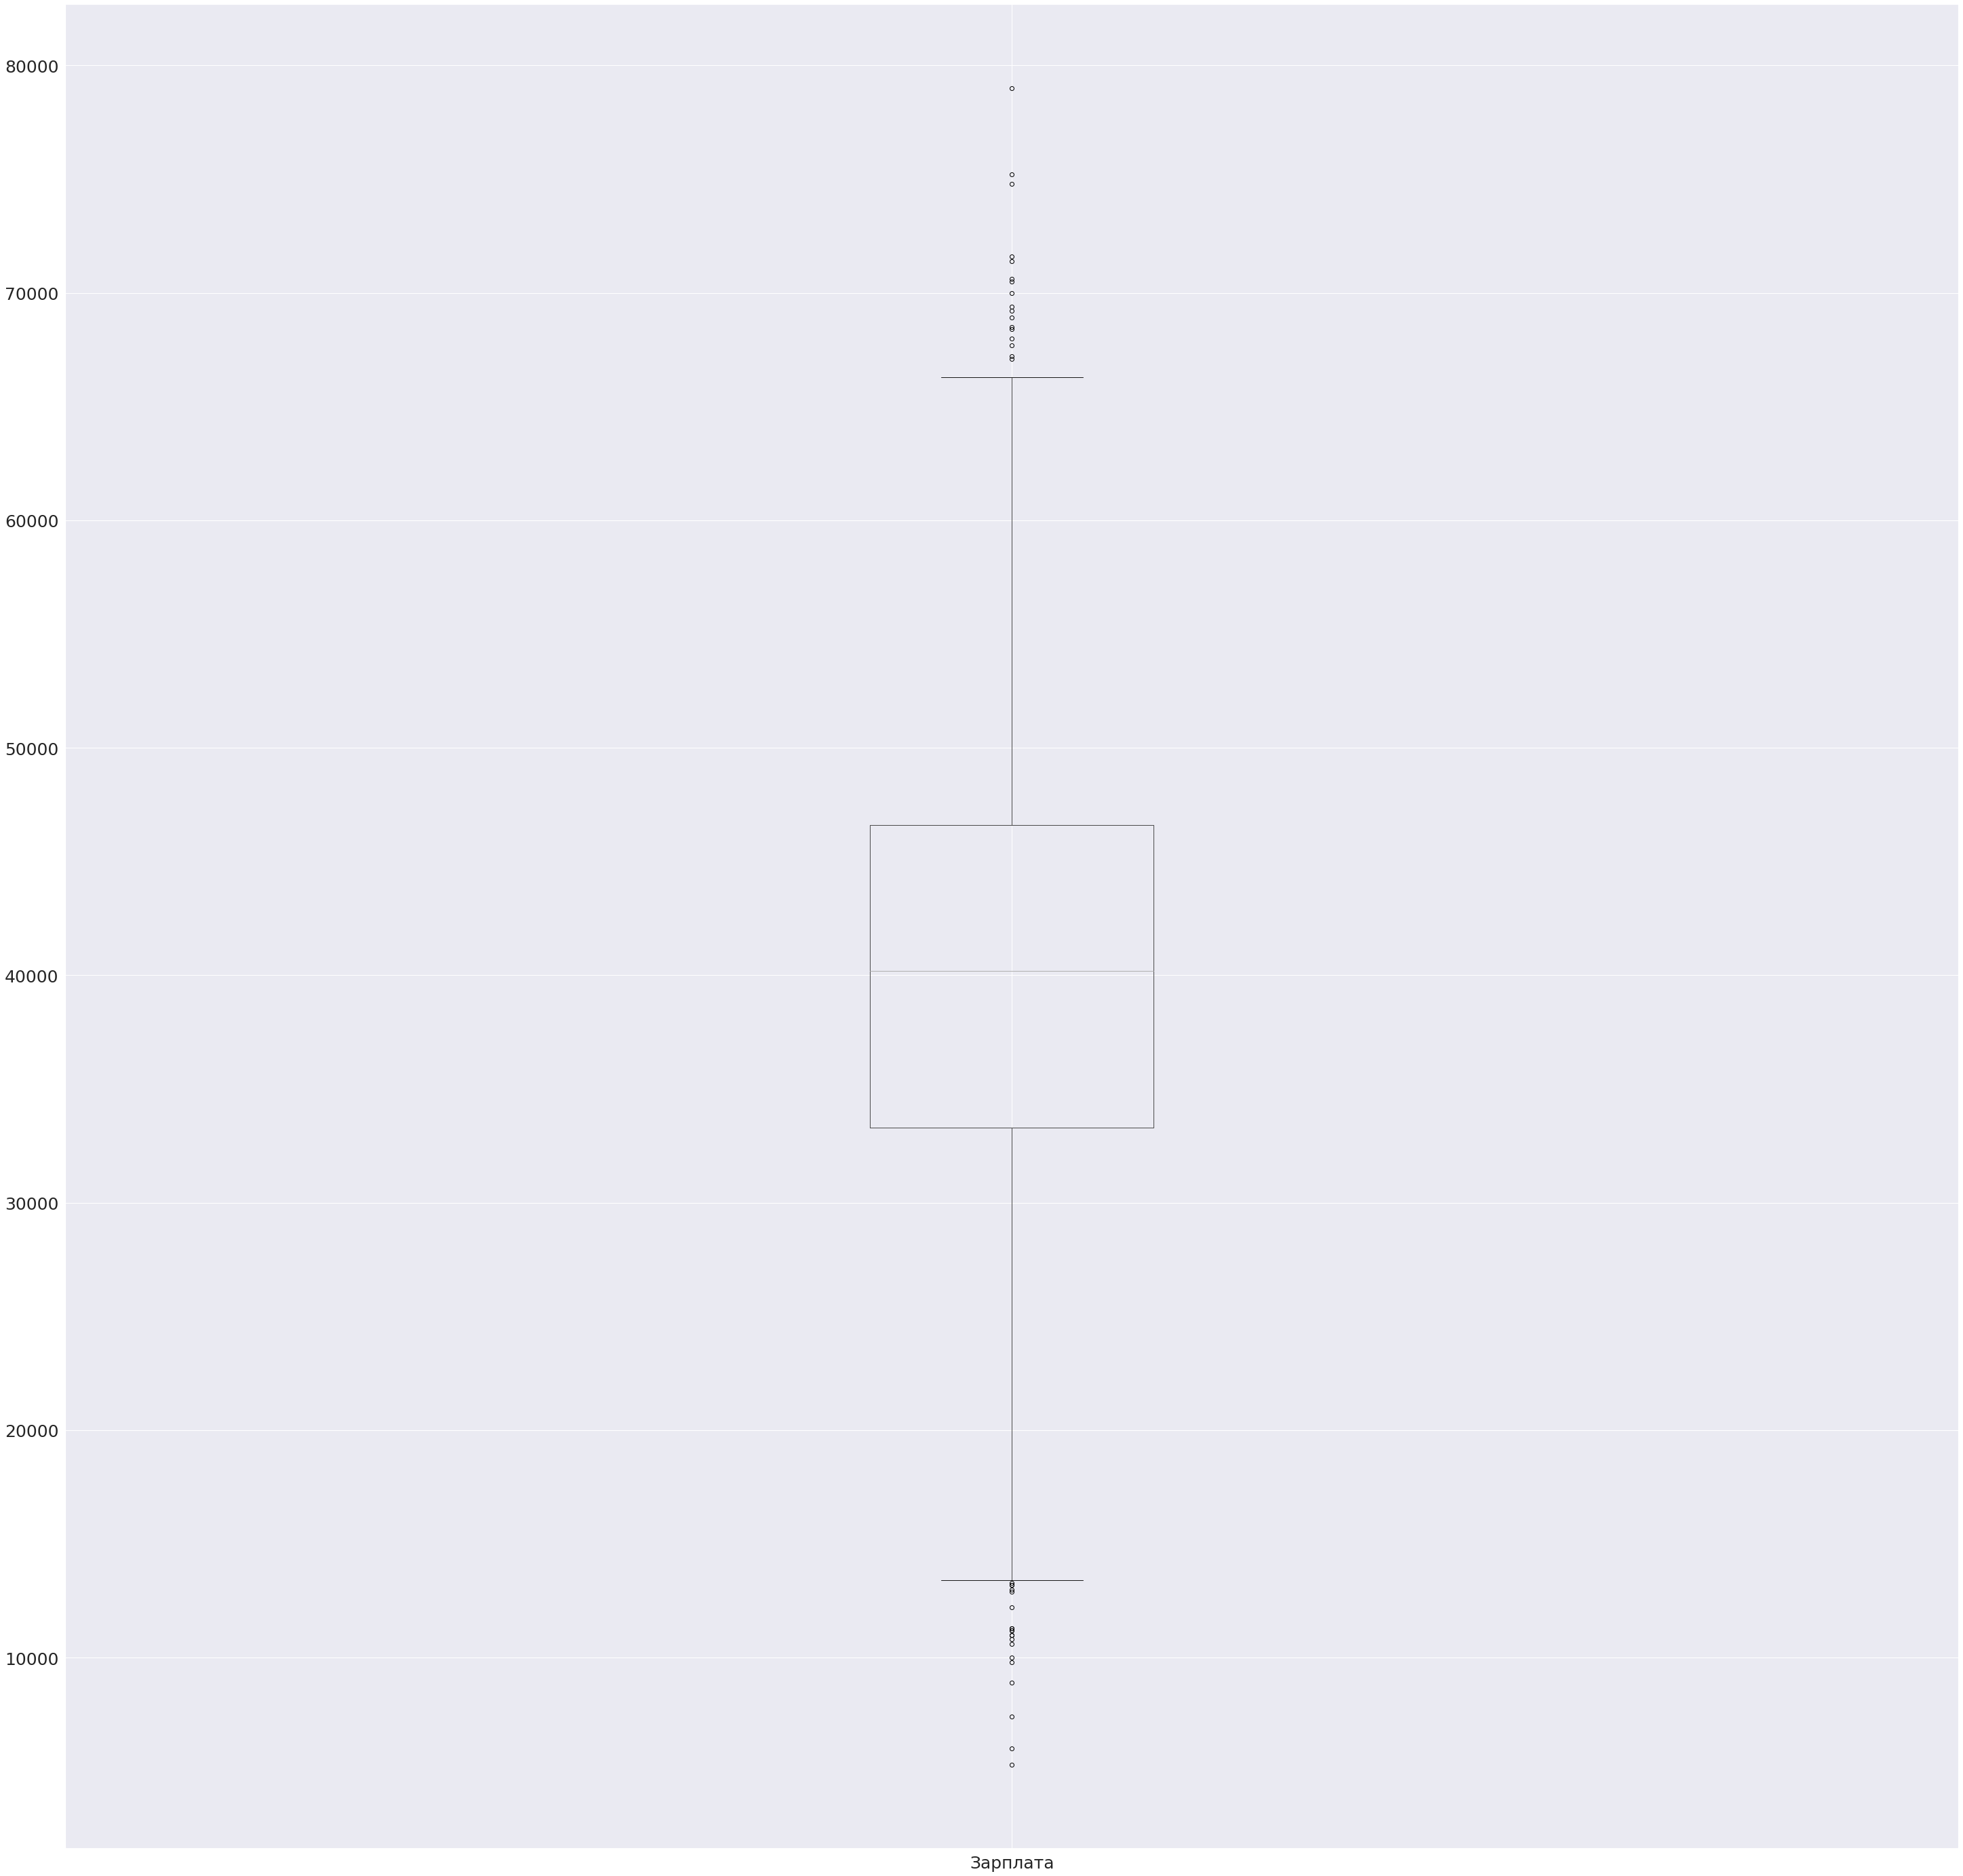

In [29]:
data.boxplot('Зарплата');


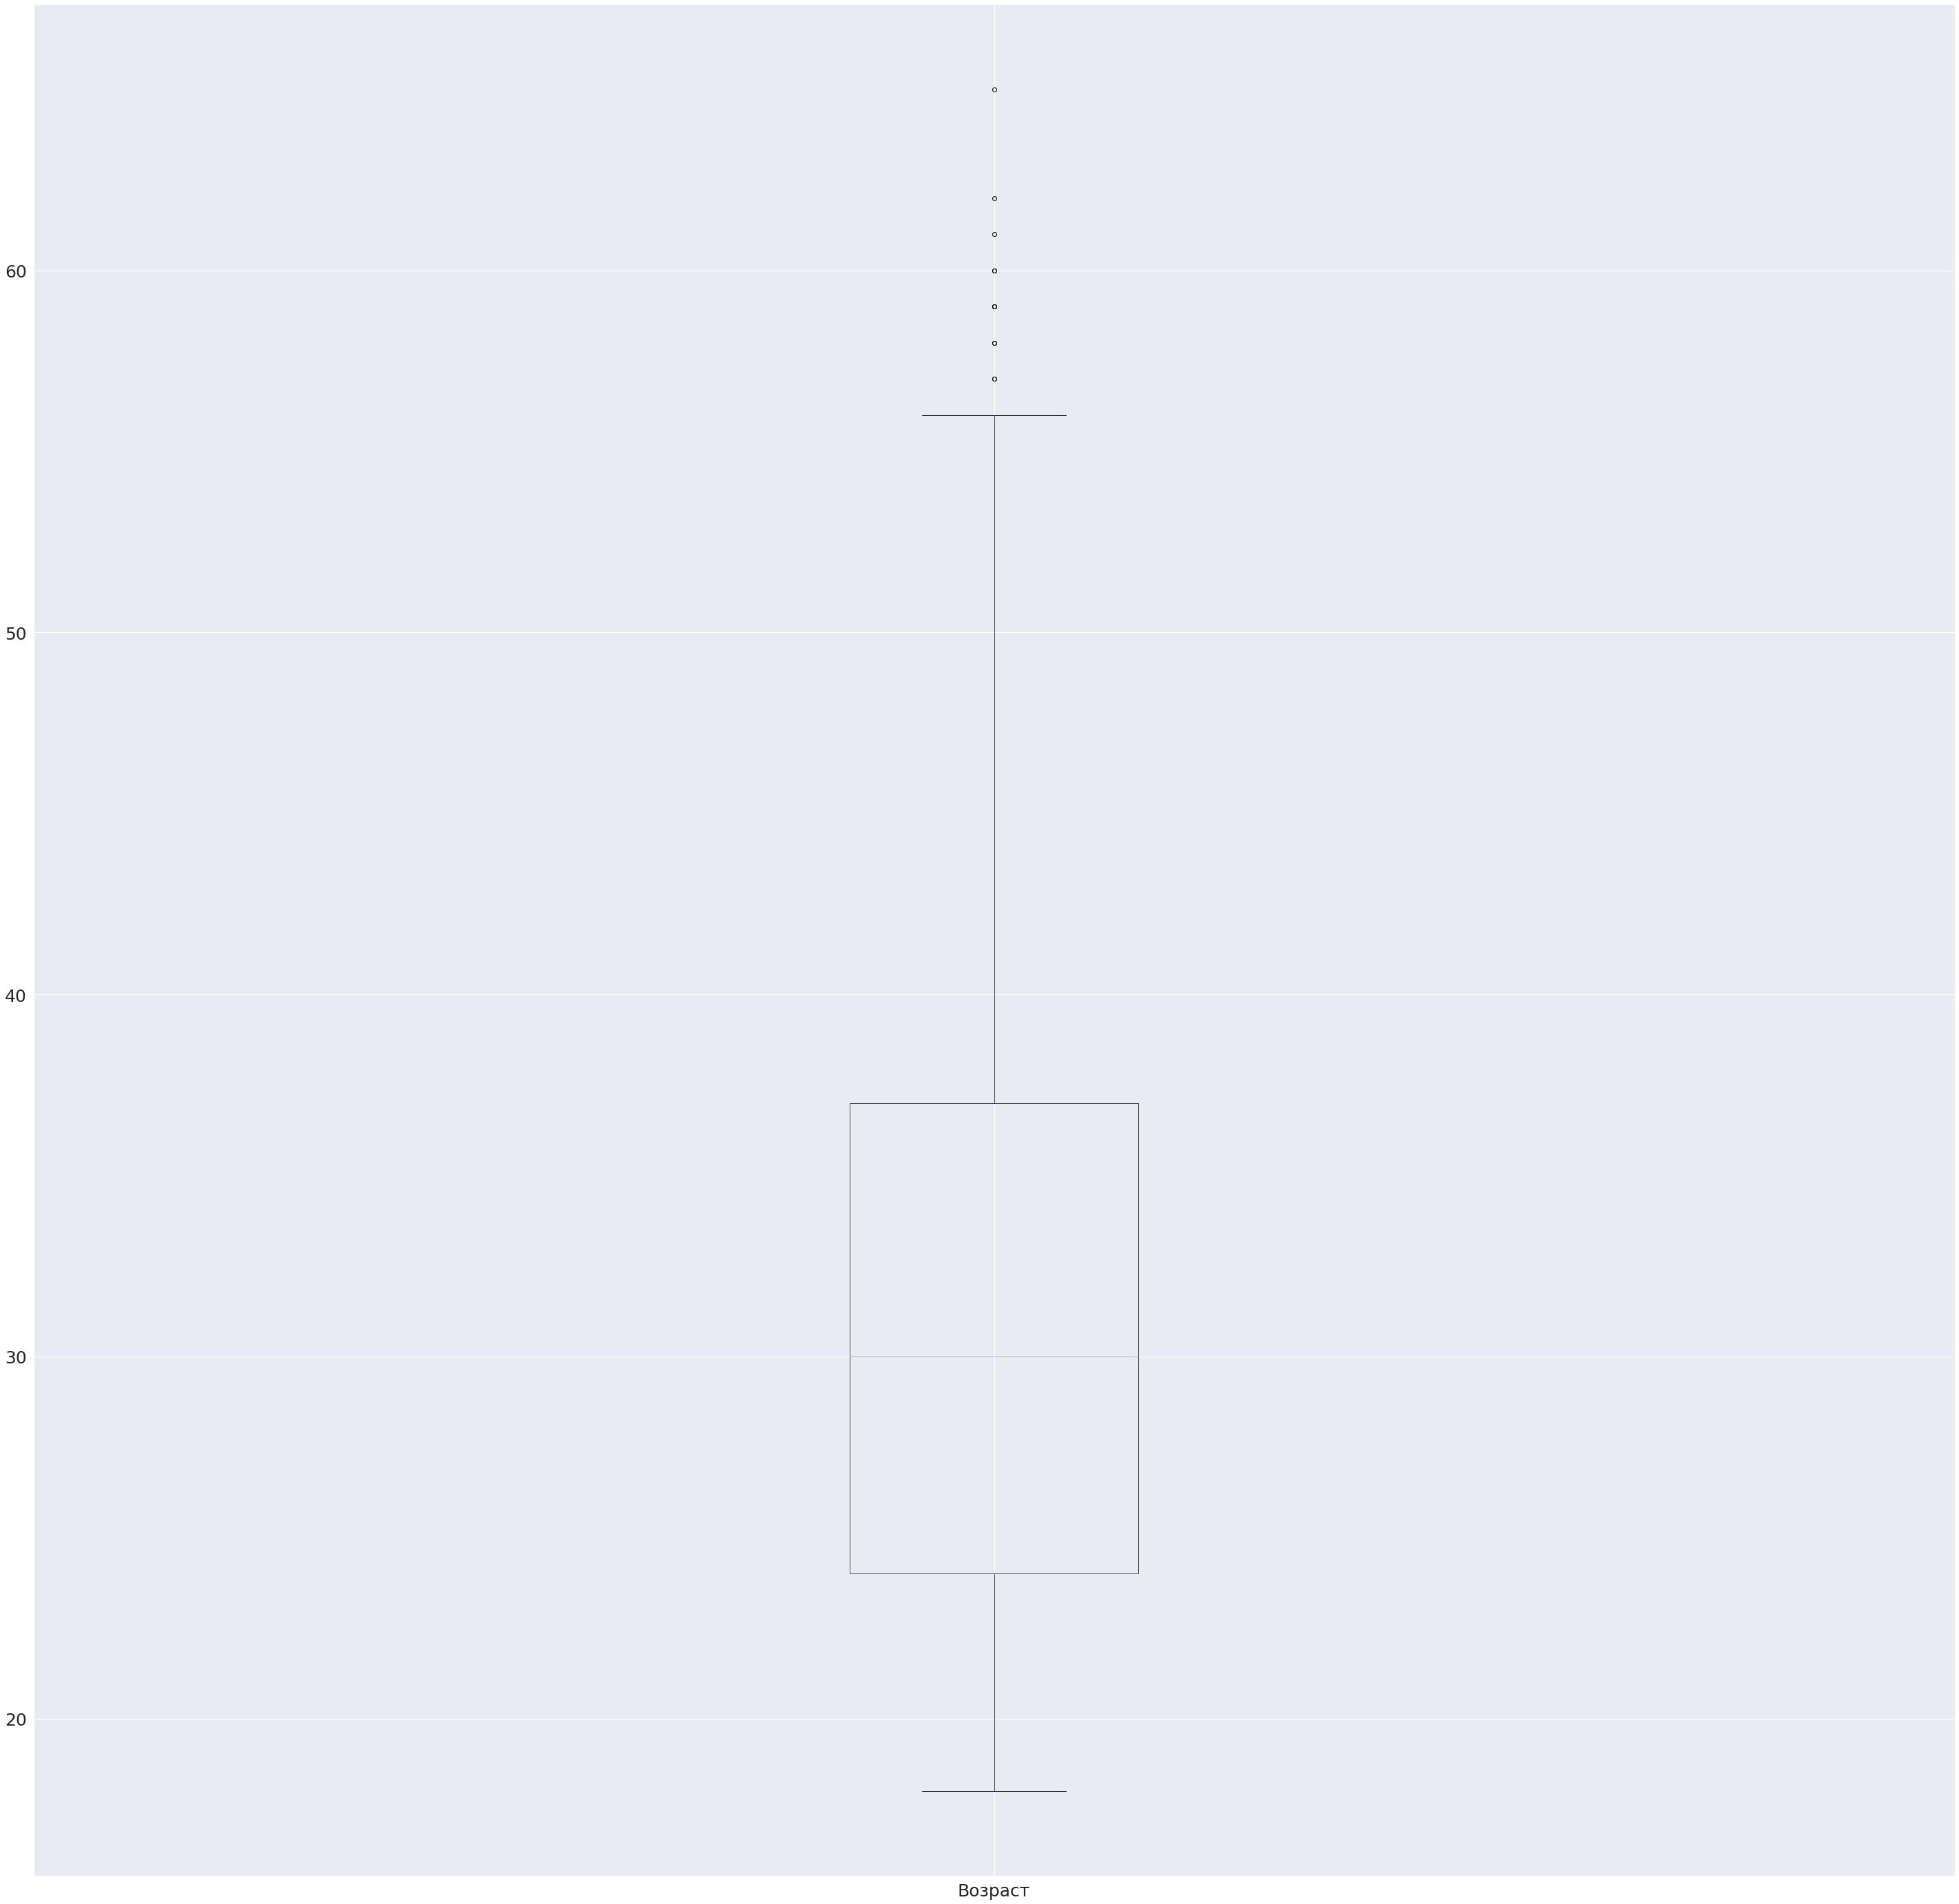

In [30]:
data.boxplot('Возраст');

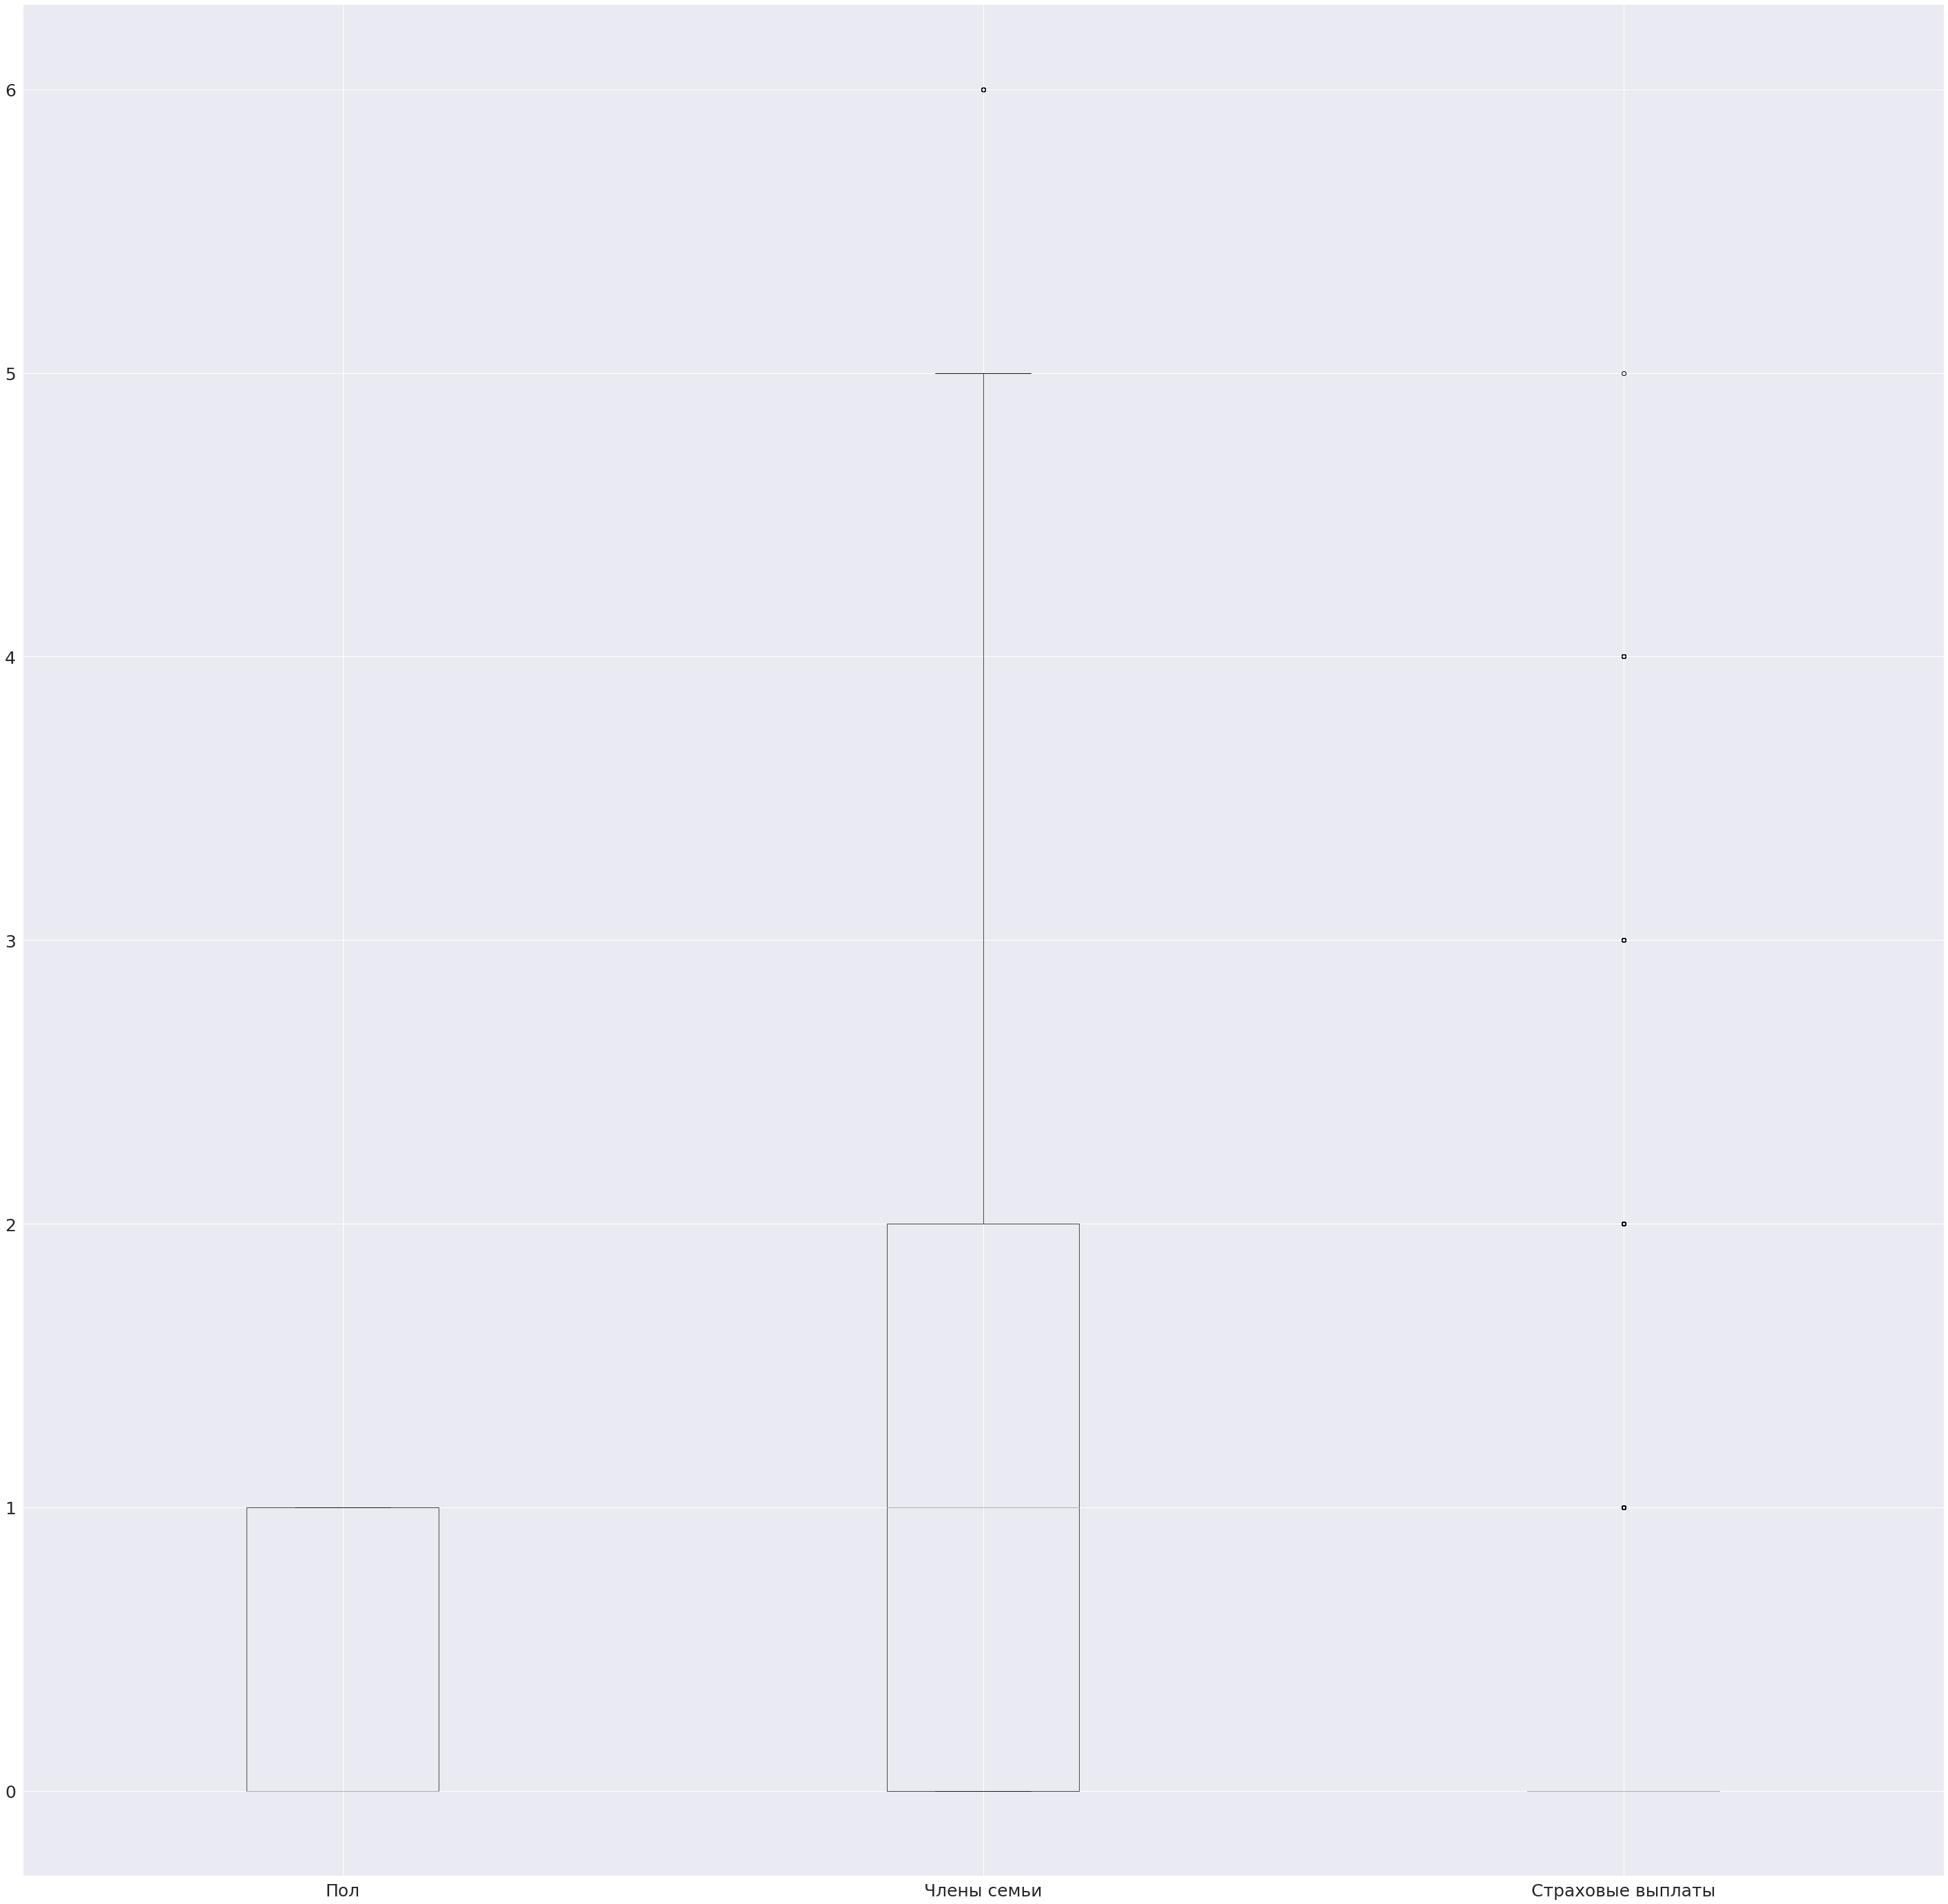

In [31]:
data.boxplot(['Пол', 'Члены семьи', 'Страховые выплаты']);

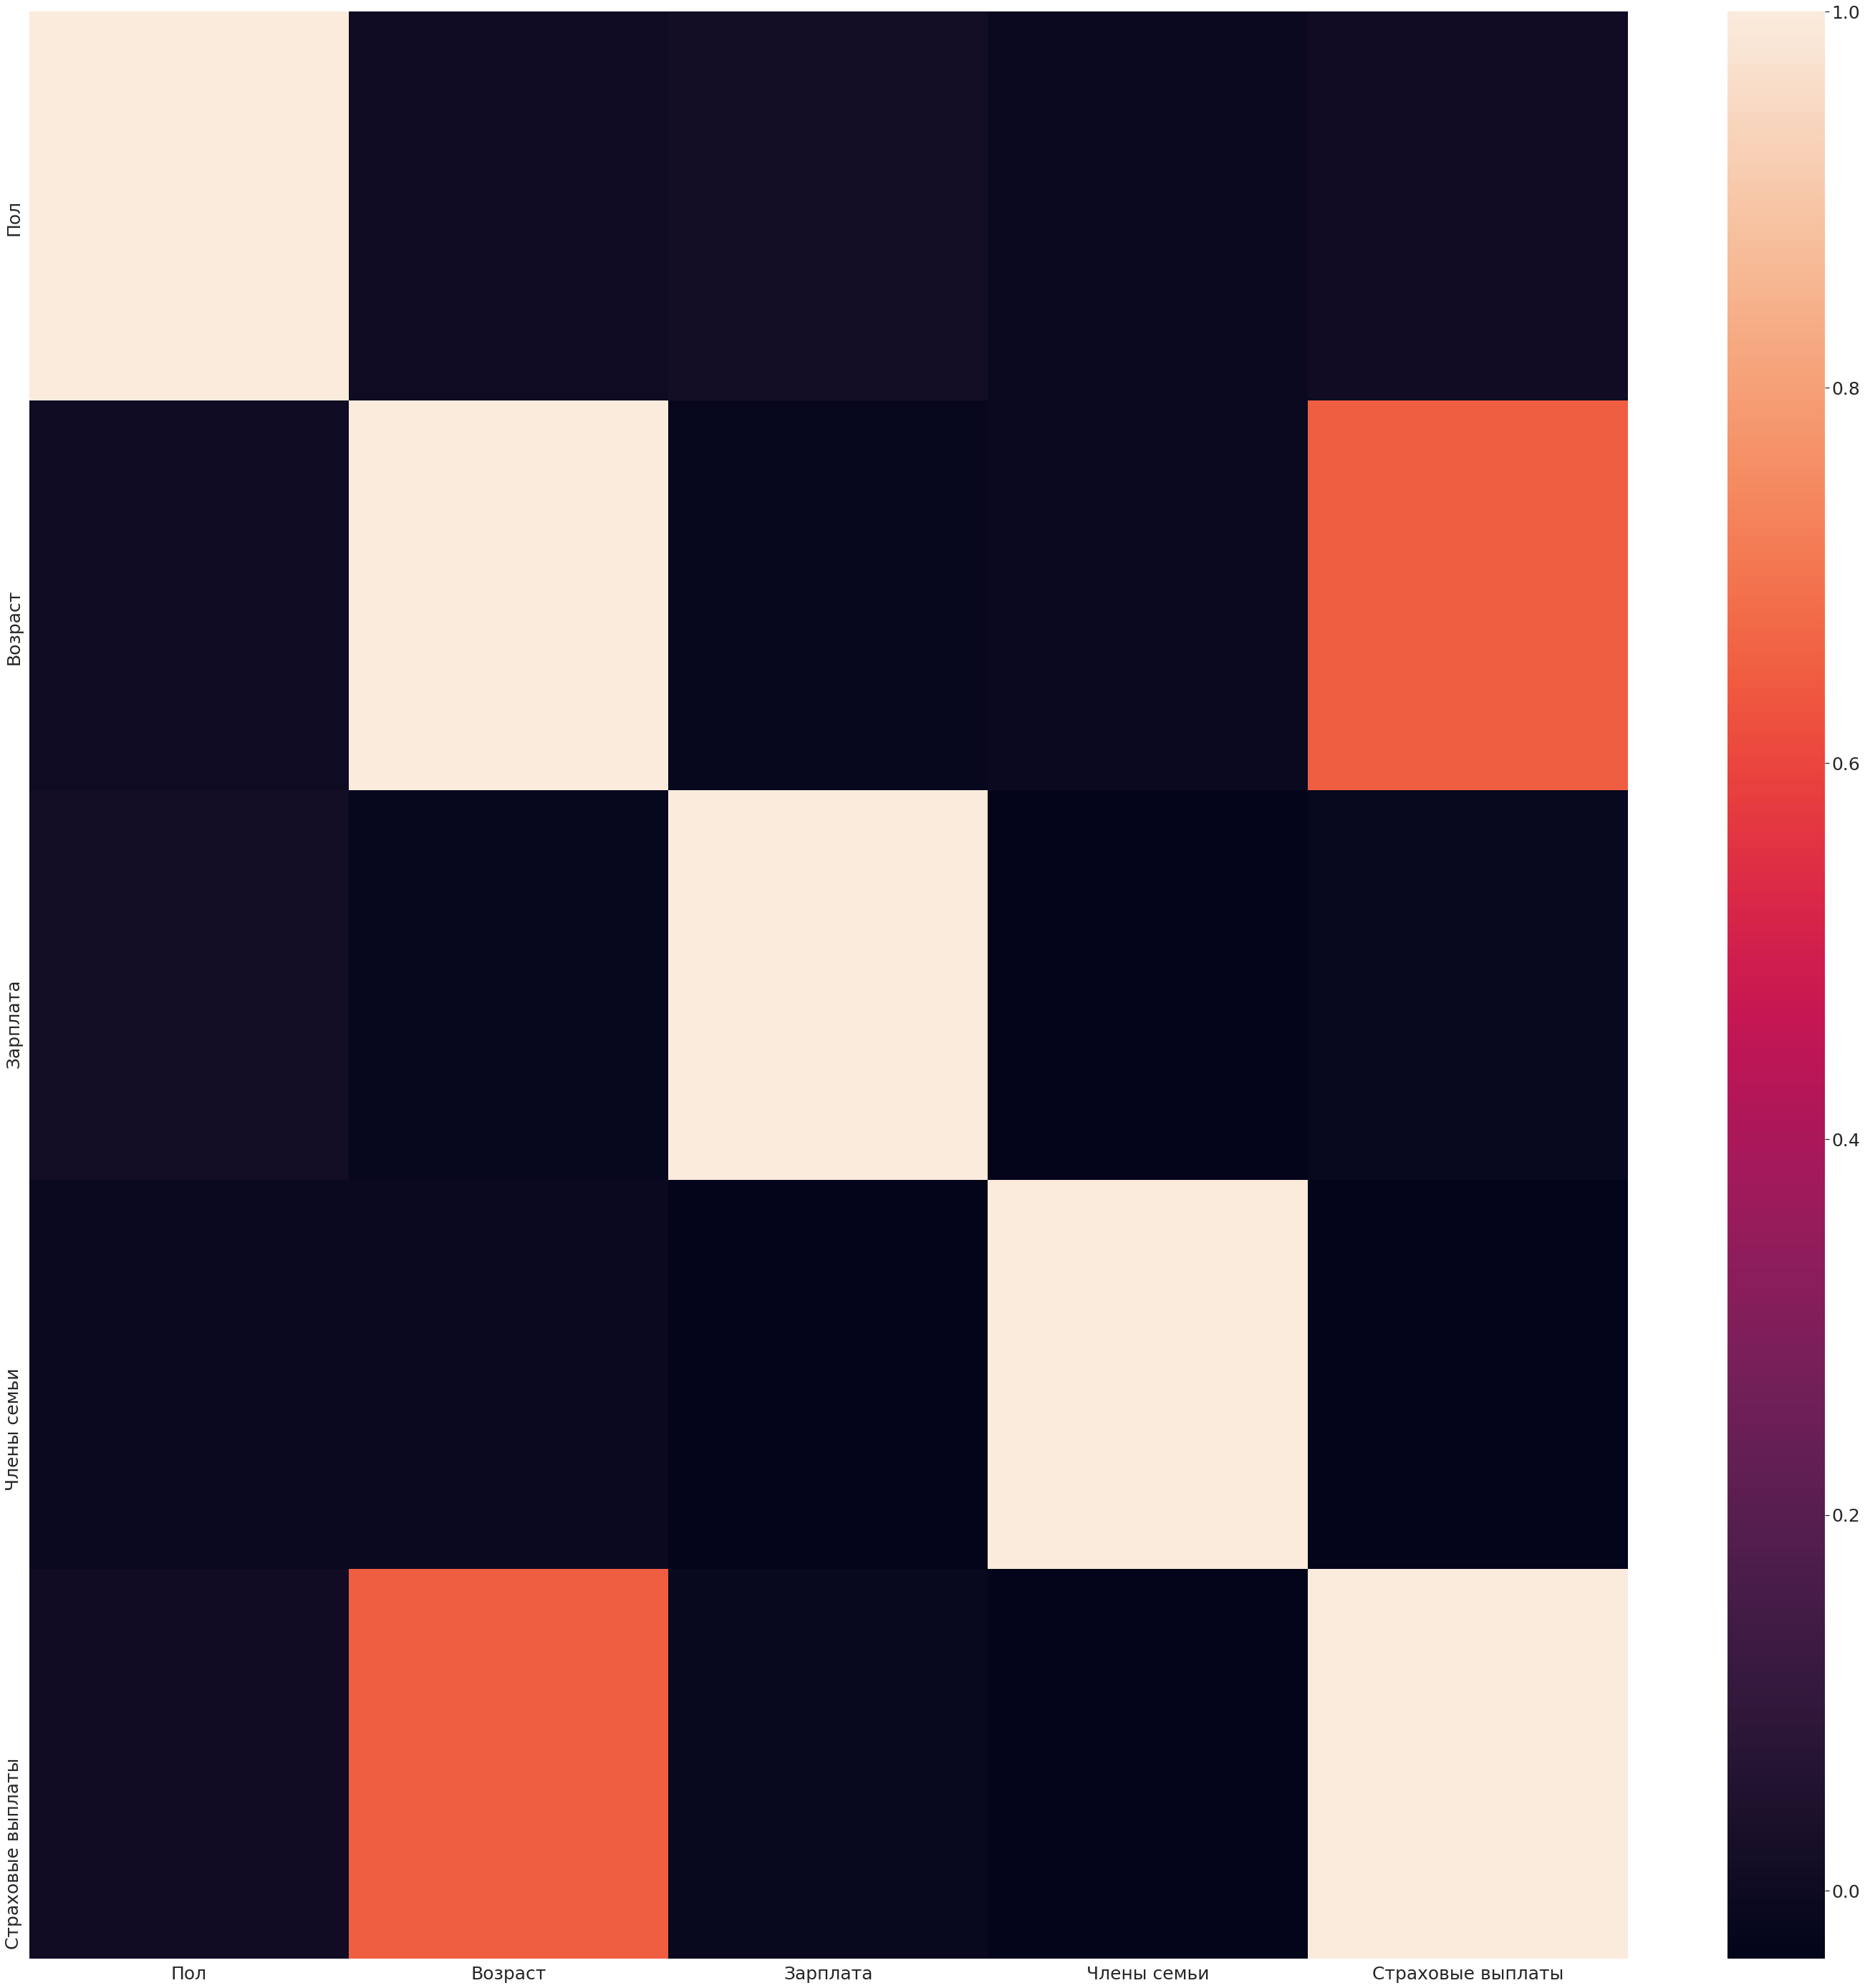

In [32]:
sns.set(font_scale=5)
sns.set(rc = {'figure.figsize':(50,50), 'ytick.labelsize': 25, 'xtick.labelsize': 25})
sns.heatmap(data.corr());

### Вывод

* Значимых проблем в данных проблем не обнаружено.
* Столбцы с правильными или логичными типами.
* Выбросы, корелляции - тоже не вызывают вопросов.
* Есть дубликаты. Их мало, можно принебречь. Тем более могут быть очень похожи клиенты - без id невозомжно определить.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится. Так как преобразование происходит через обратимую матрицу.

Если абстрагироваться от матриц, то подобным мы занимались с transform, по-моему, тоже связано с соотношением к 1, веса/параметры остаются теми же.

**Обоснование:** 
$$
𝑎=𝑋𝑤
$$

$$
w = (X^T X)^{-1} X^T y
$$
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$
$$
w' = P^{-1}w
$$

Дано, что $ X' = XP $

$$
a' = X'𝑤' = X' P^{-1}w = X P P^{-1} w = E X w = X w = a
$$

Что и требовалось доказать.

Параметры связаны преобразованием через умножение на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

1. Сначала работаем с самой базой данных:
* Делим на признаки и целевой признак.
* Создаём случайную обратимую матрицу высотой по количеству признаков.
* Умножаем признаки на случайную матрицу.
* Проверяем на дешифровку - после умножения на обратную матрицу случайной матрицы - должны получить первоначальные данные.
* Целевой признак мы не трогаем
2. Создаём две модели - для первоначальных данных и зашифрованных.
* Каждую обучаем и предсказываем отдельно.
* Во вторую модель передаём зашифрованные признаки. Если всё верно, метрика должна сойтись и лишний раз доказать, что в данном случае дело в весах, а не преобразовании, так как целевой признак мы не трогали.

**Обоснование**

При условии, что случайная матрица обратимая и высота будет соотвествовать ширине матрице признаков - умножение будет возомжным, как и дешифровка обратной матрицей - по свойствам матриц.
По формуле мы доказали, что предсказания должны быть равны при этом.

## Проверка алгоритма

In [33]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [34]:
matrix_random = np.array(np.random.normal(0, 1, (4, 4)))

4 признака - значит матрица должна быть высотой 4, и квадратной.

In [35]:
matrix_inv_random = np.linalg.inv(matrix_random)

In [36]:
features_crypt = np.array(features) @ matrix_random
features_decrypt =  features_crypt @ matrix_inv_random

In [37]:
features_decrypt = pd.DataFrame(features_decrypt, columns=['1', '2', '3', '4'])
features_decrypt.round()

,1,2,3,4
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,-0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0
...,...,...,...,...
4995,-0.0,28.0,35700.0,2.0
4996,0.0,34.0,52400.0,1.0
4997,-0.0,20.0,33900.0,2.0
4998,1.0,22.0,32700.0,3.0


Получили первоначальные данные с погрешностью на тип данных и округление из-за особенностей расчётов.

In [38]:
model = LinearRegression()
model_crypt = LinearRegression()

In [39]:
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4249455028666801


In [40]:
model_crypt.fit(features_crypt, target)
predictions_crypt = model_crypt.predict(features_crypt)
print(r2_score(target, predictions_crypt))

0.42494550286667876


Погрешностью можно принебречь - особенности расчётов. Будем считать, что они равны.

## Вывод

После шифровки данных с помощью обратимой матрицы - предсказания линейной регрессии на зашифрованных данных равны предсказаниям на первоначальных данных.
Данные поддаются дешифровке - умножением на обратную матрицу.
Доказательсво было получено математически с помощью свойств матриц, затем был предложен алгоритм решения, реализован и было получено ещё фактическое доказательство.

При умножении признаков на обратимую матрицу качество предсказания линейной регрессии не меняется.